In [23]:
from qiskit.compiler import transpile, assemble
from qiskit import IBMQ
from qiskit import QuantumCircuit,execute,Aer
from qiskit.visualization import plot_histogram
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def load_IBMQ():
    token = '' # Paste your token here
    if len(IBMQ.stored_account()) == 0:
        IBMQ.save_account(token)
        IBMQ.load_account()
    elif IBMQ.active_account() == None:
        IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
    return provider

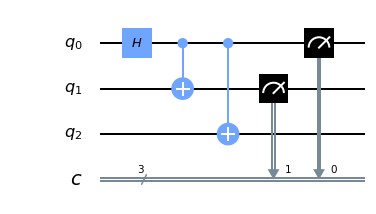

In [29]:
# create your circuit
circuit = QuantumCircuit(3, 3)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(0, 2)
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

In [10]:
provider = load_IBMQ()

In [12]:
# look at the backends you have available
backends = provider.backends()
for b in backends: print(b)

ibmq_qasm_simulator
ibmqx2
ibmq_16_melbourne
ibmq_vigo
ibmq_ourense
ibmq_valencia
ibmq_london
ibmq_burlington
ibmq_essex
ibmq_armonk
ibmq_santiago


NAME: ibmq_qasm_simulator
QUBITS: 32, Supports OpenPulse? -> False
Coupling map: None
----------------------------------------
NAME: ibmqx2
QUBITS: 5, Supports OpenPulse? -> False
Coupling map: [[0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1], [2, 3], [2, 4], [3, 2], [3, 4], [4, 2], [4, 3]]


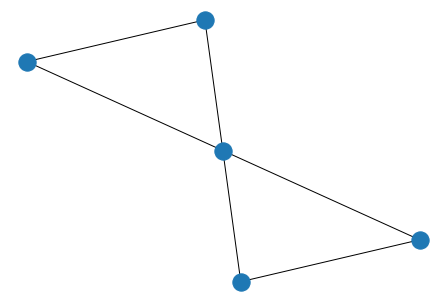

----------------------------------------
NAME: ibmq_16_melbourne
QUBITS: 15, Supports OpenPulse? -> False
Coupling map: [[0, 1], [0, 14], [1, 0], [1, 2], [1, 13], [2, 1], [2, 3], [2, 12], [3, 2], [3, 4], [3, 11], [4, 3], [4, 5], [4, 10], [5, 4], [5, 6], [5, 9], [6, 5], [6, 8], [7, 8], [8, 6], [8, 7], [8, 9], [9, 5], [9, 8], [9, 10], [10, 4], [10, 9], [10, 11], [11, 3], [11, 10], [11, 12], [12, 2], [12, 11], [12, 13], [13, 1], [13, 12], [13, 14], [14, 0], [14, 13]]


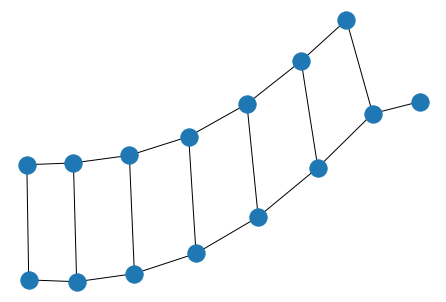

----------------------------------------
NAME: ibmq_vigo
QUBITS: 5, Supports OpenPulse? -> False
Coupling map: [[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]


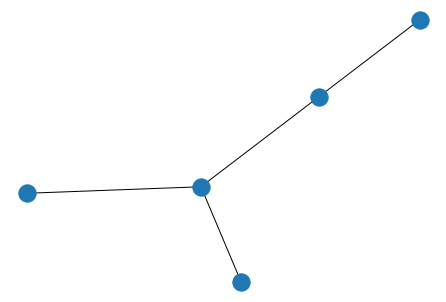

----------------------------------------
NAME: ibmq_ourense
QUBITS: 5, Supports OpenPulse? -> False
Coupling map: [[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]


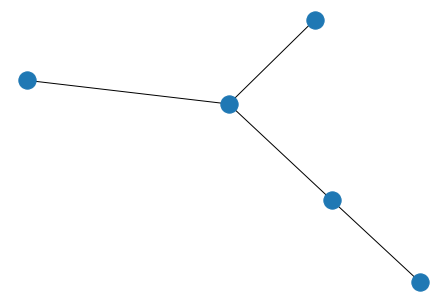

----------------------------------------
NAME: ibmq_valencia
QUBITS: 5, Supports OpenPulse? -> False
Coupling map: [[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]


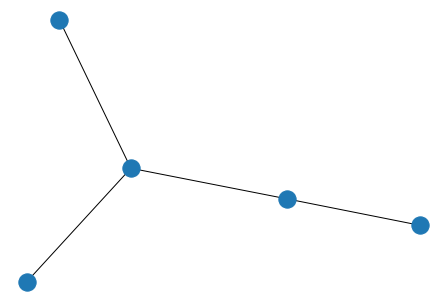

----------------------------------------
NAME: ibmq_london
QUBITS: 5, Supports OpenPulse? -> False
Coupling map: [[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]


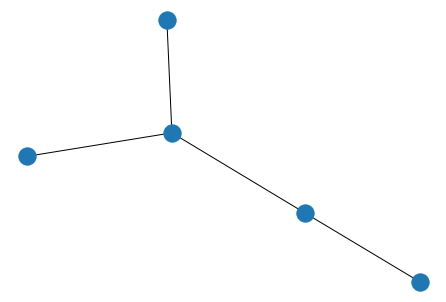

----------------------------------------
NAME: ibmq_burlington
QUBITS: 5, Supports OpenPulse? -> False
Coupling map: [[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]


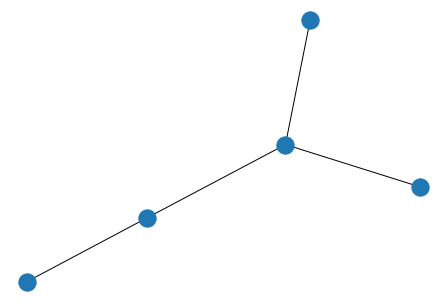

----------------------------------------
NAME: ibmq_essex
QUBITS: 5, Supports OpenPulse? -> False
Coupling map: [[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]


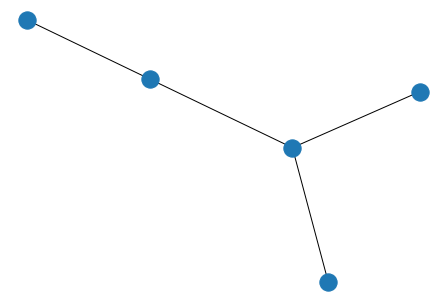

----------------------------------------
NAME: ibmq_armonk
QUBITS: 1, Supports OpenPulse? -> True
Coupling map: None
----------------------------------------
NAME: ibmq_santiago
QUBITS: 5, Supports OpenPulse? -> False
Coupling map: [[0, 1], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [4, 3]]


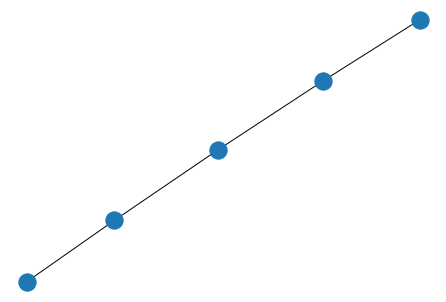

----------------------------------------


In [26]:
# there is also more detailed info for each of the backends
for backend in backends:
    print('NAME:', backend.name())
    config = backend.configuration()
    print('QUBITS: {}, Supports OpenPulse? -> {}'.format(config.n_qubits, config.open_pulse))
    print('Coupling map:', config.coupling_map) # the connectivity of the device
    if config.coupling_map is not None:
        # plot an image of the device connectivity
        cmap = nx.Graph()
        cmap.add_edges_from(config.coupling_map)
        nx.draw(cmap)
        plt.show()
    print('-'*40)

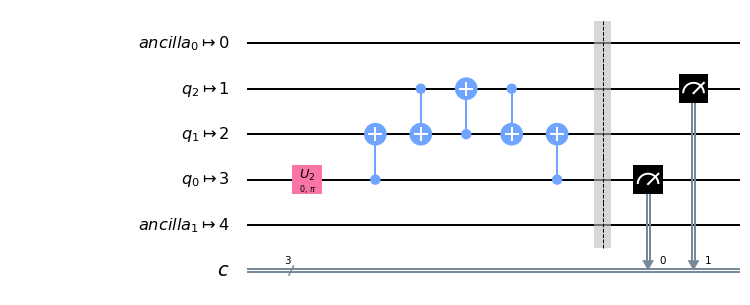

In [39]:
device_name = 'ibmq_santiago' # Select your device
device = provider.get_backend(device_name) # get the backend object
# transpile your circuit for this specific device
# Try compiling the circuit with different levels of optimization: 0, 1, 2, 3
mapped_circuit = transpile(circuit, backend=device, optimization_level=1)
job_circuits = [mapped_circuit]
mapped_circuit.draw(output='mpl')

{'000': 4076, '011': 4116}


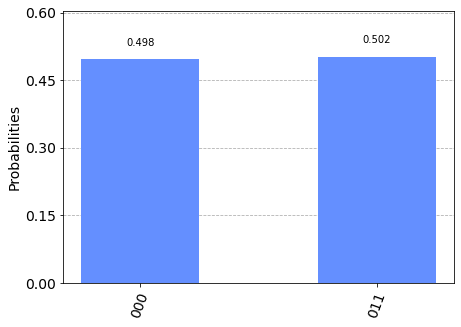

In [41]:
# To run on IBMQ device, uncomment these lines
# qobj = assemble(job_circuits, backend=device, shots=8192)
# hw_job = device.run(qobj)

# To run on qasm simulator, uncomment these lines
qobj = assemble(job_circuits, backend=Aer.get_backend('qasm_simulator'), shots=8192)
hw_job = Aer.get_backend('qasm_simulator').run(qobj)

hw_result = hw_job.result()
counts = hw_result.get_counts(circuit)
print(counts)
plot_histogram(counts)